<a href="https://colab.research.google.com/github/jrctechmind/data-science-portfolio/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving MKT.csv to MKT (1).csv
Passo 1: O arquivo MKT.csv está presente no diretório.

Passo 2: Obtendo informações gerais e estatísticas descritivas do conjunto de dados.
Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
None

Estatísticas Descritivas:
          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.9800

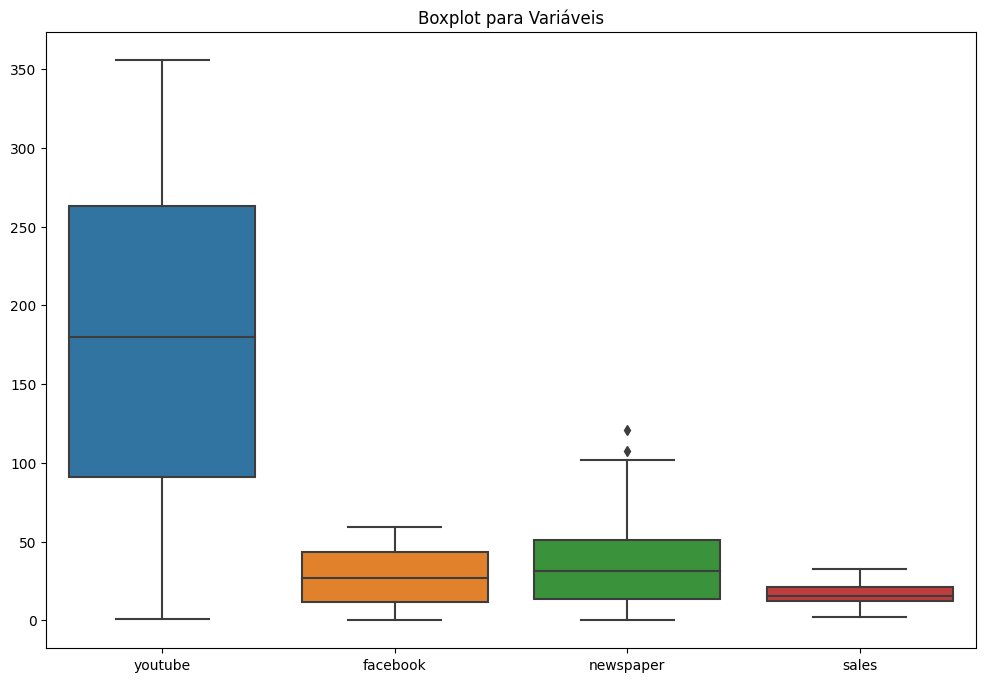

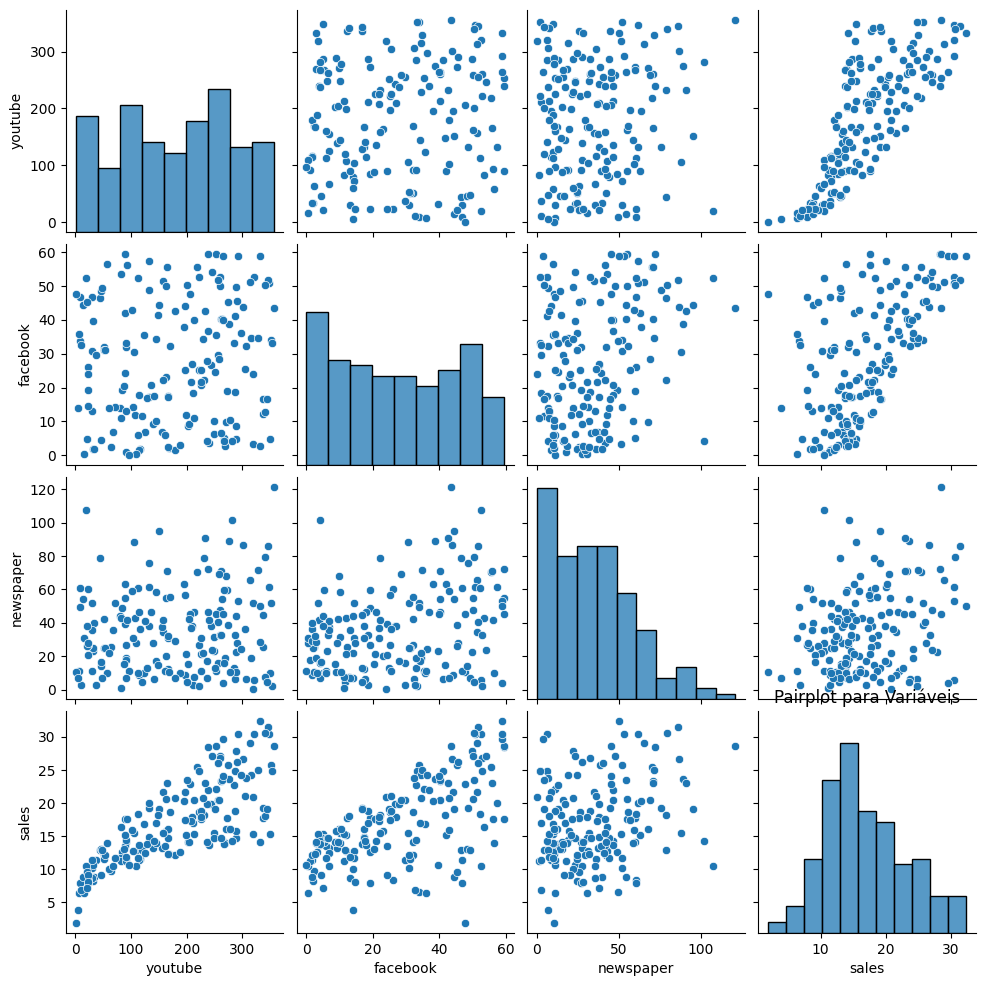

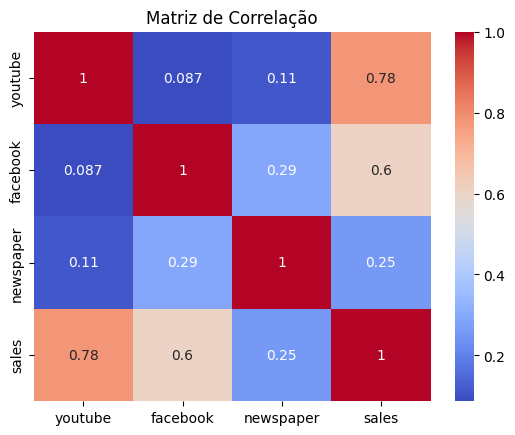

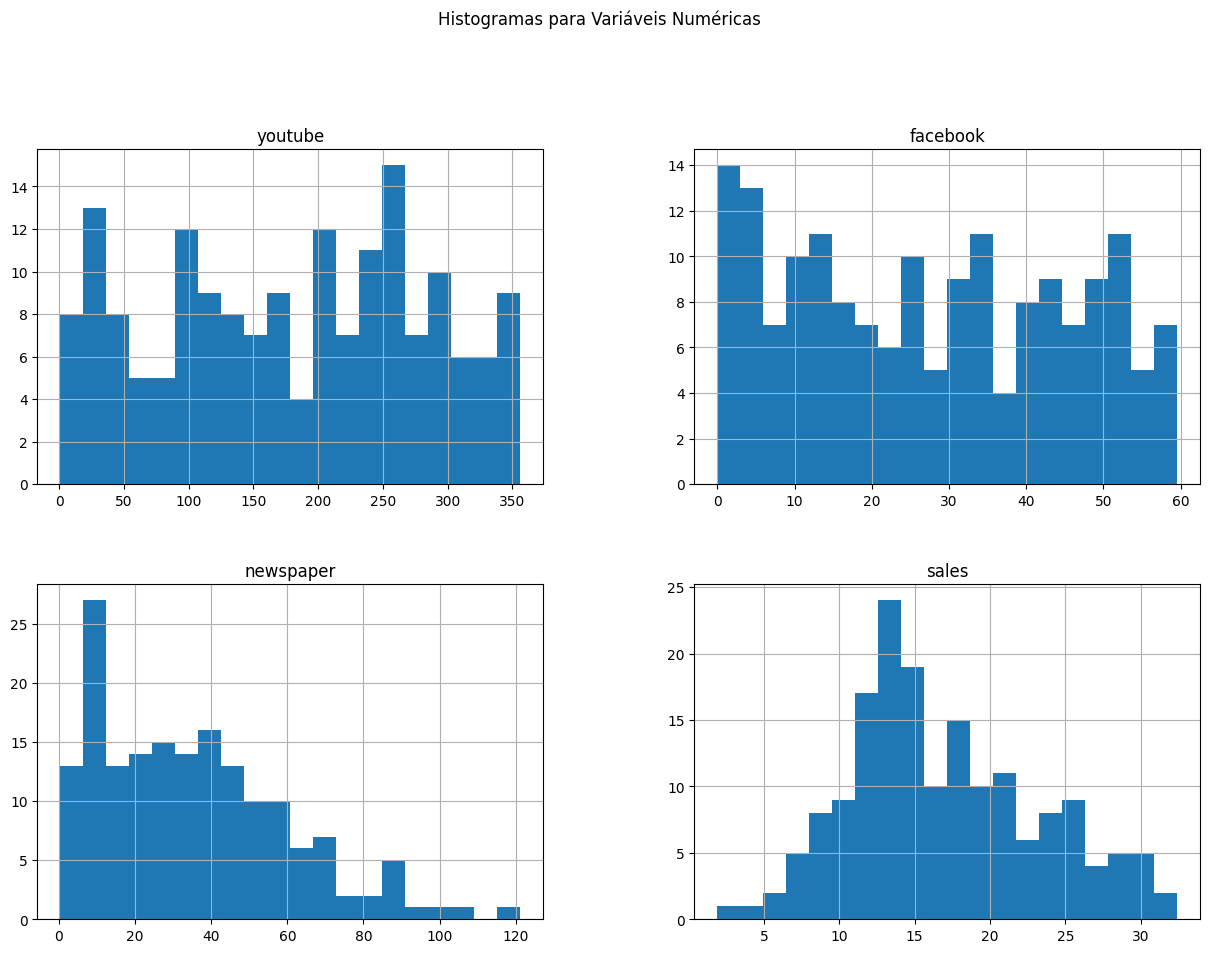


Passo 4: Avançando para a construção e avaliação do modelo de regressão linear.
Erro Quadrático Médio (MSE): 5.5767902340267135
Coeficiente de Determinação (R^2): 0.872863085701216

Passo 4: Explicação da Avaliação do Modelo:
O MSE mede a média dos quadrados dos erros, enquanto o R^2 indica a proporção da variância na variável dependente explicada pelo modelo.

Passo 5: Calculando a previsão de vendas para novos investimentos: 12.009808445374022

Passo 5: Explicação do Cálculo da Predição:
Utilizando o modelo treinado para prever as vendas com base em novos investimentos em marketing.


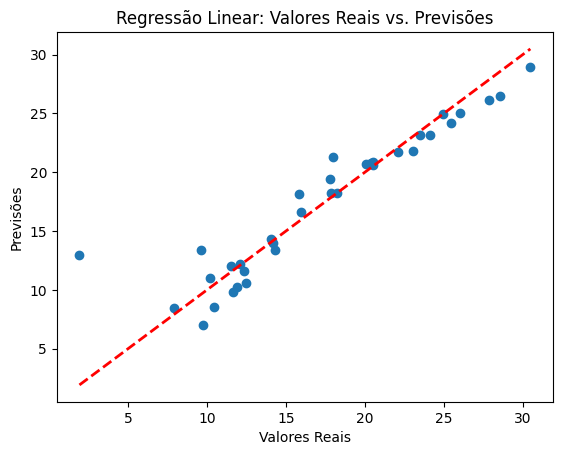


Passo 6: Examinando os coeficientes do Modelo:
youtube: 0.0441858407408404
facebook: 0.19448197522021865
newspaper: -4.883410929948373e-05
Intercepto: 3.7030498901645927

Passo 6: Explicação dos Coeficientes do Modelo:
Os coeficientes indicam a contribuição de cada variável na previsão das vendas. O intercepto é o valor esperado quando todas as variáveis são zero.

Passo 7: A análise foi concluída


In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# Realizar o upload do arquivo MKT.csv
uploaded = files.upload()

# Verificar a presença do arquivo no diretório
file_path = 'MKT.csv'
if os.path.exists(file_path):
    print(f'Passo 1: O arquivo {file_path} está presente no diretório.')
else:
    print(f'Passo 1: O arquivo {file_path} não está presente no diretório.')

# Se o arquivo estiver presente, continuar com a leitura e análise
if os.path.exists(file_path):
    # Leitura do arquivo CSV removendo manualmente o caractere indesejado
    df = pd.read_csv(file_path, encoding='utf-8')

    # Remover caracteres indesejados nos nomes das colunas
    df.columns = df.columns.str.strip('ï»¿')

    # Remover caracteres indesejados nos dados
    df = df.apply(lambda x: x.str.strip('ï»¿') if x.dtype == "object" else x)

    # Realizar uma análise inicial para obter informações gerais e estatísticas descritivas do conjunto de dados
    print("\nPasso 2: Obtendo informações gerais e estatísticas descritivas do conjunto de dados.")
    print("Informações Gerais:")
    print(df.info())
    print("\nEstatísticas Descritivas:")
    print(df.describe())
    print("\nPasso 2: Explicação das Estatísticas Descritivas:")
    print("As estatísticas descritivas oferecem uma visão resumida das variáveis, incluindo média, desvio padrão, mínimo, 25º percentil, mediana, 75º percentil e máximo.")

    # Identificar correlações entre variáveis no conjunto de dados
    correlation_matrix = df.corr()
    print("\nPasso 3: Identificando correlações entre variáveis.")
    print("Correlação entre Variáveis:")
    print(correlation_matrix)
    print("\nPasso 3: Explicação da Análise de Correlação:")
    print("A matriz de correlação ajuda a identificar relações lineares entre variáveis. Valores próximos a 1 indicam forte correlação positiva, enquanto valores próximos a -1 indicam forte correlação negativa.")

    # Examinar gráficos exploratórios para entender melhor o conjunto de dados
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df)
    plt.title('Boxplot para Variáveis')
    plt.show()

    sns.pairplot(df)
    plt.title('Pairplot para Variáveis')
    plt.show()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlação')
    plt.show()

    df.hist(bins=20, figsize=(15, 10))
    plt.suptitle('Histogramas para Variáveis Numéricas', y=1.02)
    plt.show()

    # Avançar para a etapa de modelagem, construindo um modelo de regressão linear
    X = df[['youtube', 'facebook', 'newspaper']].values
    y = df['sales'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nPasso 4: Avançando para a construção e avaliação do modelo de regressão linear.")
    print("Erro Quadrático Médio (MSE):", mse)
    print("Coeficiente de Determinação (R^2):", r2)
    print("\nPasso 4: Explicação da Avaliação do Modelo:")
    print("O MSE mede a média dos quadrados dos erros, enquanto o R^2 indica a proporção da variância na variável dependente explicada pelo modelo.")

    # Calcular a previsão de vendas com base em novos investimentos em marketing
    new_investments = [[100, 20, 30]]  # Substituir esses valores pelos seus próprios investimentos
    predicted_sales = model.predict(new_investments)
    print(f'\nPasso 5: Calculando a previsão de vendas para novos investimentos: {predicted_sales[0]}')
    print("\nPasso 5: Explicação do Cálculo da Predição:")
    print("Utilizando o modelo treinado para prever as vendas com base em novos investimentos em marketing.")

    # Visualizar o desempenho do modelo por meio de gráficos
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.title('Regressão Linear: Valores Reais vs. Previsões')
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.show()

    # Examinar os coeficientes do modelo para entender sua contribuição
    print('\nPasso 6: Examinando os coeficientes do Modelo:')
    for feature, coef in zip(['youtube', 'facebook', 'newspaper'], model.coef_):
        print(f'{feature}: {coef}')
    print(f'Intercepto: {model.intercept_}')
    print("\nPasso 6: Explicação dos Coeficientes do Modelo:")
    print("Os coeficientes indicam a contribuição de cada variável na previsão das vendas. O intercepto é o valor esperado quando todas as variáveis são zero.")

    # Finalizando a análise destacando pontos essenciais
    print("\nPasso 7: A análise foi concluída")

else:
    print("Não foi localizado o arquivo MKT.csv.")